In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

In [18]:
def comp(n):
    T = 1
    X = 1
    Y = 1
    Mx = 5
    My = 5
    N = n
    dt = T / (N-1)
    dx = X / (Mx - 1)
    dy = Y / (My-1)
    
    d = 1
    ax = d*dt/(dx**2)
    ay = d*dt/(dy**2)
    
    U = np.zeros((N,Mx,My))
    Us= np.zeros((N,Mx,My))
    
    x = np.linspace(0,X,Mx)
    y = np.linspace(0,Y,My)
    
    for i in range(Mx):
        for j in range(My):
            U[0,i,j]=np.sin(np.pi * x[i]) * np.sin(np.pi * y[j])
    
    for i in range(Mx):
        for j in range(My):
            Us[0,i,j]=np.sin(np.pi * x[i]) * np.sin(np.pi * y[j])

    #U[0,:,:] = np.sin(np.pi * X) * np.sin(np.pi * Y)
    #Us[0,:,:] = np.sin(np.pi * X) * np.sin(np.pi * Y)
    
    for k in range(N-1):
        for i in range(1,My-1):
            A1 = -ax/2*np.ones(Mx-1)
            A2 = (1+ax) * np.ones(Mx)
            A3 = -ax/2*np.ones(Mx-1)
            
            B = (1-ay)*U[k,:,i] + ay/2*U[k,:,i-1] + ay/2*U[k,:,i+1]
            
            Us[k,0,i] = 0
            Us[k,-1,i] = 0
            Us[k+1,:,i] = tms(A1,A2,A3,B)
        
        for j in range(1,My-1):
            A1 = -ay/2*np.ones(My-1)
            A2 = (1+ay) * np.ones(My)
            A3 = -ay/2*np.ones(My-1)
            
            B = (1-ax)*Us[k+1,j,:] + ax/2*Us[k+1,j-1,:] + ax/2*Us[k+1,j+1,:]
            
            U[k,0,:] = 0
            U[k,-1,:] = 0
            U[k,:,0] = 0
            U[k,:,-1] = 0
            U[k+1,j,:] = tms(A1,A2,A3,B)
            
    return x,y,U

In [19]:
def tms(a,b,c,d):
    n = len(d)
    x = np.zeros(n)
    c_ = np.zeros(n)
    d_ = np.zeros(n)
    
    #Forward Elimination
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    
    for i in range(0, n-1):
        temp = b[i] - a[i] * c_[i-1]
        c_[i] = c[i] / temp
        d_[i] = (d[i] - a[i] * d_[i-1]) / temp
        
    #Backward Elimination
    for i in range(n-2,-1,-1):
        d_[i] = d_[i] - c_[i] * d_[i+1]
    
    return d_


In [20]:
def show3(x,y,z):
    fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
    x, y = np.meshgrid(x,y)
    surf = ax.plot_surface(x,y,z)
    fig.colorbar(surf,shrink=0.5,aspect=5)
    ax.set_zlim(0,1)
    plt.show
    return

In [21]:
x,y,U = comp(10)

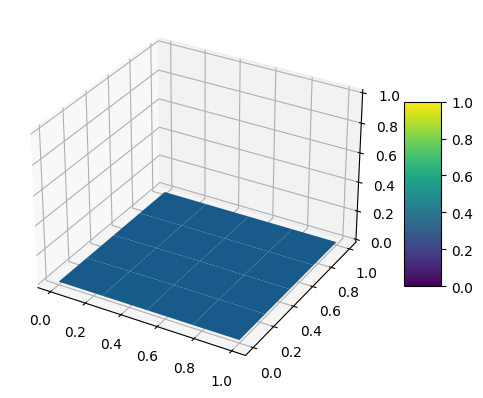

In [22]:
show3(x,y,U[3,:,:])

In [23]:
print(U)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 5.00000000e-01 7.07106781e-01 5.00000000e-01
   0.00000000e+00]
  [0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
   0.00000000e+00]
  [0.00000000e+00 5.00000000e-01 7.07106781e-01 5.00000000e-01
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 8.67901616e-02 1.12129163e-01 7.79028490e-02
   0.00000000e+00]
  [0.00000000e+00 9.03444668e-02 1.16721172e-01 8.10931934e-02
   0.00000000e+00]
  [0.00000000e+00 5.96563513e-02 7.70734447e-02 5.35475410e-02
   0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [0.00000000e+00 1.25716693e-02 1.40278042e-02 9.15982697e-03
   0.00000000e+00]
  [0.0000000